<a href="https://colab.research.google.com/github/rifda83/steam-recommendations/blob/main/Rifda_Sasmi_Zahra_Progress_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steam Recommendations through Cluster-Content Based Filtering**

## Objective

To create a genre-based game recommendation system on Steam that enhances user engagement and increases game sales by delivering personalized game suggestions to users based on their gaming preferences.

*   Increasing Game Discovery \\
    helps surface relevant games that align with individual users' preferences, making it easier for them to find and purchase games they are more likely to enjoy.
*   Personalized User Experience \\
    users can receive suggestions that are specifically tailored to their tastes, improving their overall satisfaction and loyalty to the platform.



## Dataset
https://www.kaggle.com/datasets/artermiloff/steam-games-dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

# Data Collecting

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/Dibimbing.id/Final Project/DS 26_Rifda Sasmi Zahra_Progress Final Project/games_may2024_full.csv')
# df = pd.read_csv('games_may2024_full.csv')
df

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,NaN,True,False,False,0,NaN,37,1701431,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"['KRAFTON, Inc.']","['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,NaN,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1641404,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1557234,236827,50000000 - 100000000,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 2317

# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87806 entries, 0 to 87805
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     87806 non-null  int64  
 1   name                      87803 non-null  object 
 2   release_date              87806 non-null  object 
 3   required_age              87806 non-null  int64  
 4   price                     87806 non-null  float64
 5   dlc_count                 87806 non-null  int64  
 6   detailed_description      83656 non-null  object 
 7   about_the_game            83634 non-null  object 
 8   short_description         83713 non-null  object 
 9   reviews                   10314 non-null  object 
 10  header_image              87806 non-null  object 
 11  website                   39906 non-null  object 
 12  support_url               42224 non-null  object 
 13  support_email             73123 non-null  object 
 14  window

* AppID: Unique identifier for each game on Steam.
* name: The name/title of the game.
* release_date: The date the game was released on Steam.
* required_age: Minimum required age to play the game (age rating).
* price: The current price of the game.
* dlc_count: Number of downloadable content (DLC) available for the game.
* detailed_description: A long, detailed description of the game.
* about_the_game: A summary or overview of what the game is about.
* short_description: A concise description of the game.
* reviews: User-written reviews of the game.
* header_image: URL or link to the game's main image (header).
* website: Official website for the game, if available.
* support_url: URL for customer or technical support for the game.
* support_email: Email address for customer or technical support.
* windows: Boolean value indicating if the game supports Windows.
* mac: Boolean value indicating if the game supports macOS.
* linux: Boolean value indicating if the game supports Linux.
* metacritic_score: The game’s score on Metacritic (aggregated critic reviews).
* metacritic_url: Link to the game's page on Metacritic.
* achievements: Number of achievements available in the game.
* recommendations: Number of Steam users who recommend the game.
* notes: Additional notes or information about the game.
* supported_languages: List of languages supported by the game.
* full_audio_languages: List of languages with full audio support.
* packages: Information on different game package versions.
* developers: Game developers or development studios.
* publishers: Publishers responsible for the game.
* categories: Categories or tags describing the game’s content (e.g., single-player, multiplayer).
* genres: The genre(s) of the game (e.g., action, strategy).
* screenshots: Links or URLs to the game’s screenshots.
* movies: Links or URLs to the game’s trailers or videos.
* user_score: Steam user rating or score for the game.
* score_rank: Game’s rank based on user scores (if available).
* positive: Number of positive reviews for the game.
* negative: Number of negative reviews for the game.
* estimated_owners: Estimated number of owners or players of the game.
* average_playtime_forever: Average playtime for users who have played the game (in minutes).
* average_playtime_2weeks: Average playtime over the past 2 weeks (in minutes).
* median_playtime_forever: Median playtime for users (in minutes).
* median_playtime_2weeks: Median playtime over the past 2 weeks (in minutes).
* peak_ccu: Peak concurrent users for the game (highest number of players at once).
* tags: Tags or keywords associated with the game.
* pct_pos_total: Percentage of total positive reviews.
* num_reviews_total: Total number of user reviews.
* pct_pos_recent: Percentage of positive reviews from recent reviews.
* num_reviews_recent: Number of recent reviews (within the last 30 days).

# Data Preprocessing

In [ ]:
notes_df = df[~df['notes'].isnull()]
notes_df[['notes']]

,notes
0,Includes intense violence and blood.
9,Includes cartoon violence and gore.
12,Contains violence and caveman themed nudity. I...
14,The Witcher 3: Wild Hunt contains strong langu...
15,"Cyberpunk 2077 contains strong language, inten..."
...,...
87757,The game combines a cartoony tone with machine...
87763,"The game features blood effects, traces of blo..."
87767,"Sexual themed images, featuring a lesbian coup..."
87778,Cartoon violence


In [ ]:
df['packages'].loc[10]

"[{'title': 'Buy Terraria', 'description': '', 'subs': [{'text': 'Terraria - $9.99', 'description': '', 'price': 9.99}, {'text': 'Terraria - Commercial License - $9.99', 'description': '', 'price': 9.99}, {'text': 'Terraria 4-Pack - $29.99', 'description': '', 'price': 29.99}]}]"

In [ ]:
df.columns

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')

## Missing Values

In [ ]:
missing_values = df.isna().sum()
missing_values_df = pd.DataFrame({'missing_count': missing_values,
                                  'perc': round(missing_values / len(df) * 100, 2)})
missing_values_df.sort_values(by='missing_count', ascending=False)

,missing_count,perc
score_rank,87765,99.95
metacritic_url,83825,95.47
reviews,77492,88.25
notes,73589,83.81
website,47900,54.55
support_url,45582,51.91
support_email,14683,16.72
about_the_game,4172,4.75
detailed_description,4150,4.73
short_description,4093,4.66


There are some missing values in the dataset, but my main focus is the name column, which has three missing values. These rows need to be removed. For the other columns, I will replace all missing values with 'no data,' as it is plausible that certain fields, such as reviews, could be empty. For instance, not all games have been played by users, so it's possible for some games to have no reviews.

In [ ]:
df.dropna(subset=['name'], inplace=True, axis=0)

In [ ]:
df = df.drop(['score_rank'], axis=1)

df['metacritic_url'] = df['metacritic_url'].fillna('No data')
df['reviews'] = df['reviews'].fillna('No data')
df['notes'] = df['notes'].fillna('No data')
df['website'] = df['website'].fillna('No data')
df['support_url'] = df['support_url'].fillna('No data')
df['support_email'] = df['support_email'].fillna('No data')
df['about_the_game'] = df['about_the_game'].fillna('No data')
df['detailed_description'] = df['detailed_description'].fillna('No data')
df['short_description'] = df['short_description'].fillna('No data')

In [ ]:
df.isna().sum()

,0
AppID,0
name,0
release_date,0
required_age,0
price,0
dlc_count,0
detailed_description,0
about_the_game,0
short_description,0
reviews,0


## Duplicated Data

In [ ]:
df.duplicated().sum()

0

No duplicated data



## Remove some Playtest, test server, demo games

Since playtest and test server games are only meant for testing and should not be played by users, they will be removed from the dataset.

In [ ]:
filtered_df = df[
    (df['detailed_description'] == 'No data') &
    (df['about_the_game'] == 'No data') &
    (df['short_description'] == 'No data')
]

filtered_df


,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
18,1952710,BACKGAMMON Playtest,2023-10-10,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],[],[],0,0,0,0 - 0,0,0,0,0,0,[],73,640754,66,323515
60,1724660,New World Playtest,2021-09-08,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],[],[],0,0,0,0 - 0,0,0,0,0,0,[],70,234957,58,535
66,1584640,NARAKA: BLADEPOINT Playtest,2021-04-16,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],['https://cdn.akamai.steamstatic.com/steam/app...,[],0,0,0,0 - 0,0,0,0,0,0,[],75,224416,74,6160
80,1620000,Dinosaur Island Playtest,2021-04-29,0,0.0,0,No data,No data,No data,No data,https://shared.akamai.steamstatic.com/store_it...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],['https://shared.akamai.steamstatic.com/store_...,[],0,0,0,0 - 0,0,0,0,0,0,[],96,200701,-1,-1
81,2869650,Rift Playtest,2024-03-21,0,0.0,0,No data,No data,No data,No data,https://shared.akamai.steamstatic.com/store_it...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],[],[],0,0,0,0 - 0,0,0,0,0,0,[],96,200701,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87730,2860470,智斗模拟器 Wits Battle Simulator Playtest,2024-03-06,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],['https://cdn.akamai.steamstatic.com/steam/app...,[],0,0,0,0 - 0,0,0,0,0,0,[],-1,-1,-1,-1
87738,2886130,God Brawl Playtest,2024-03-14,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],[],[],0,0,0,0 - 0,0,0,0,0,0,[],-1,-1,-1,-1
87766,2497820,Little Ghosthunter Playtest,2023-09-29,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,0,0,No data,[],[],[],[],[''],[],[],['https://cdn.akamai.steamstatic.com/steam/app...,[],0,0,0,0 - 0,0,0,0,0,0,[],-1,-1,-1,-1
87775,1976910,Cardia Playtest,2022-04-27,0,0.0,0,No data,No data,No data,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,False,0,No data,1,0,No data,[],[],[],[],[''],[],[],['https://cdn.akamai.steamstatic.com/steam/app...,[],0,0,0,0 - 0,0,0,0,0,0,[],-1,-1,-1,-1


In [ ]:
# condition = df['name'].str.contains('Playtest$', na=False)
condition = (df['detailed_description'] == 'No data') & (df['about_the_game'] == 'No data') & (df['short_description'] == 'No data')
df = df[~condition]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83715 entries, 0 to 87805
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     83715 non-null  int64  
 1   name                      83715 non-null  object 
 2   release_date              83715 non-null  object 
 3   required_age              83715 non-null  int64  
 4   price                     83715 non-null  float64
 5   dlc_count                 83715 non-null  int64  
 6   detailed_description      83715 non-null  object 
 7   about_the_game            83715 non-null  object 
 8   short_description         83715 non-null  object 
 9   reviews                   83715 non-null  object 
 10  header_image              83715 non-null  object 
 11  website                   83715 non-null  object 
 12  support_url               83715 non-null  object 
 13  support_email             83715 non-null  object 
 14  windows    

## Fill empty list in categories, genres, developers, publishers

In [ ]:
import ast

for item in ['categories','genres','developers','publishers']:
  df[item] = df[item].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

df['genres'].loc[0]

['Action', 'Free to Play']

In [ ]:
target = []

filtered_df = df[df['categories'].apply(lambda x: x == target) |
              df['genres'].apply(lambda x: x == target) |
              df['developers'].apply(lambda x: x == target) |
              df['publishers'].apply(lambda x: x == target)]

filtered_df

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
419,241930,Middle-earth™: Shadow of Mordor™,2014-09-30,0,3.99,16,Note: certain features for the Middle-earth: S...,Note: certain features for the Middle-earth: S...,Fight through Mordor and uncover the truth of ...,“AMAZING” 9.3/10 – IGN “Revolutionary” 5/5 – J...,https://shared.akamai.steamstatic.com/store_it...,http://www.shadowofmordor.com,http://support.wbgames.com,support@wbgames.com or Wbgames.intsupport@warn...,True,False,False,84,https://www.metacritic.com/game/pc/middle-eart...,74,54996,No data,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",[{'title': 'Buy Middle-earth™: Shadow of Mordo...,[Monolith Productions],"[Warner Bros. Interactive Entertainment, Warne...","[Single-player, Steam Achievements, Full contr...",[],['https://shared.akamai.steamstatic.com/store_...,[],0,78367,6486,5000000 - 10000000,1192,90,1093,90,898,"{'Open World': 1521, 'Action': 1421, 'Fantasy'...",92,55086,89,297
622,900883,The Elder Scrolls IV: Oblivion® Game of the Ye...,2009-06-16,17,19.99,0,The Elder Scrolls IV: Oblivion® Game of the Ye...,The Elder Scrolls IV: Oblivion® Game of the Ye...,The Elder Scrolls IV: Oblivion® Game of the Ye...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.elderscrolls.com,No data,No data,True,False,False,94,https://www.metacritic.com/game/pc/the-elder-s...,0,36324,No data,['English'],[],[{'title': 'Buy The Elder Scrolls IV: Oblivion...,[Bethesda Game Studios®],[Bethesda Softworks],"[Single-player, Steam Cloud, Family Sharing]",[],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,43100,2007,2000000 - 5000000,0,0,0,0,0,"{'RPG': 1500, 'Open World': 1414, 'Fantasy': 9...",95,36482,91,321
655,1451940,NEEDY STREAMER OVERLOAD,2022-01-21,0,15.99,1,spin off / About the Game NEEDY STREAMER OVERL...,NEEDY STREAMER OVERLOAD is a “multi-ending ADV...,NEEDY STREAMER OVERLOAD is a “multi-ending ADV...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,info@wss.tokyo,True,True,False,0,No data,33,33457,No data,"['English', 'Japanese', 'Simplified Chinese', ...",[],"[{'title': 'Buy NEEDY STREAMER OVERLOAD', 'des...","[WSS playground, xemono]",[WSS playground],"[Single-player, Steam Achievements, Family Sha...",[],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,33851,1764,500000 - 1000000,217,0,176,0,351,"{'Psychological Horror': 812, 'Anime': 666, 'S...",95,33621,93,786
1417,71250,Sonic Adventure DX,2011-03-04,0,7.99,0,An ancient evil lurking within the Master Emer...,An ancient evil lurking within the Master Emer...,An ancient evil lurking within the Master Emer...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.sega.com,https://support.sega.co.uk,No data,True,False,False,0,No data,15,11800,No data,"['English', 'French', 'German', 'Japanese', 'S...",[],"[{'title': 'Buy Sonic Adventure DX', 'descript...",[SEGA],[SEGA],"[Single-player, Full controller support, Famil...",[],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,13001,1308,500000 - 1000000,460,0,160,0,122,"{'Platformer': 224, 'Great Soundtrack': 203, '...",92,11822,93,147
1892,48220,Might & Magic: Heroes VI,2011-10-13,0,9.99,0,Ubisoft Online Services Decommission Update Fr...,"The adventure in Heroes VI, starting 400 years...",

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x if x != [] else 'No data')
df['categories'] = df['categories'].apply(lambda x: x if x != [] else 'No data')
df['developers'] = df['developers'].apply(lambda x: x if x != [] else 'No data')
df['publishers'] = df['publishers'].apply(lambda x: x if x != [] else 'No data')

In [ ]:
df[df['name'] == 'NEEDY STREAMER OVERLOAD']

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
655,1451940,NEEDY STREAMER OVERLOAD,2022-01-21,0,15.99,1,spin off / About the Game NEEDY STREAMER OVERL...,NEEDY STREAMER OVERLOAD is a “multi-ending ADV...,NEEDY STREAMER OVERLOAD is a “multi-ending ADV...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,info@wss.tokyo,True,True,False,0,No data,33,33457,No data,"['English', 'Japanese', 'Simplified Chinese', ...",[],"[{'title': 'Buy NEEDY STREAMER OVERLOAD', 'des...","[WSS playground, xemono]",[WSS playground],"[Single-player, Steam Achievements, Family Sha...",No data,['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,33851,1764,500000 - 1000000,217,0,176,0,351,"{'Psychological Horror': 812, 'Anime': 666, 'S...",95,33621,93,786


In [ ]:
target = ['N/A']

filtered_df = df[df['categories'].apply(lambda x: x == target) |
              df['genres'].apply(lambda x: x == target) |
              df['developers'].apply(lambda x: x == target) |
              df['publishers'].apply(lambda x: x == target)]

filtered_df

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
11840,408120,Cibele,2015-11-02,18,8.99,1,Cibele is a game based on a true story about l...,Cibele is a game based on a true story about l...,"Cibele is a game about love, sex, and the inte...",“Cibele is a crazy-real game about falling in ...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cibelegame.com,http://cibelegame.com,cibelegame@gmail.com,True,True,False,71,https://www.metacritic.com/game/pc/cibele?ftag...,0,328,No data,['English'],['English'],"[{'title': 'Buy Cibele', 'description': '', 's...",[Star Maid Games],[N/A],"[Single-player, Captions available, Family Sha...",[Indie],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,646,634,50000 - 100000,0,0,0,0,0,"{'Indie': 45, 'Female Protagonist': 38, 'Nudit...",67,328,-1,-1
14683,364450,Freshman Year,2015-04-20,0,0.00,0,Freshman Year is a vignette game about an ordi...,Freshman Year is a vignette game about an ordi...,Freshman Year is a vignette game about an ordi...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://ninasays.so/freshmanyear,http://ninasays.so/freshmanyear,test@test.com,True,True,False,0,No data,0,0,No data,['English'],[],[],"[Nina Freeman, Laura Knetzger, Stephen Lawrenc...",[N/A],[Single-player],[Indie],['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,128,82,20000 - 50000,28,0,28,0,0,"{'Indie': 26, 'Short': 12, 'Visual Novel': 8, ...",60,210,-1,-1
18569,970800,Short Circuit VR,2018-11-19,0,0.00,0,Update Version 0.3 (28 December 2018) Improved...,Short Circuit VR is an electronics lab simulat...,Short Circuit VR is an electronics lab simulat...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,https://shortcircuitvr.com,https://shortcircuitvr.com,contact@shortcircuitvr.com,True,False,False,0,No data,0,0,No data,['English'],[],[],"[Stefan Bauwens, Cindy Ho]",[N/A],"[Single-player, Tracked Controller Support, VR...","[Indie, Simulation, Early Access]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,102,24,50000 - 100000,0,0,0,0,0,"{'Simulation': 35, 'Indie': 33, 'Early Access'...",80,126,-1,-1
24848,1128690,Plunge,2019-08-23,0,4.99,1,It's time to take the Plunge! Enter the advent...,It's time to take the Plunge! Enter the advent...,It's time to take the Plunge! Enter the advent...,“let me say this in as clear terms as I can: t...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.plungegame.com/,No data,steampowered@spookybuns.com,True,True,False,0,No data,22,0,No data,"['English', 'Portuguese - Brazil']",[],"[{'title': 'Buy Plunge', 'description': '', 's...",[Spooky Buns],[N/A],"[Single-player, Steam Achievements, Captions a...","[Action, Adventure, Indie, Strategy]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,123,12,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Strategy': 41, 'Action': 41, 'A...",95,65,-1,-1
26116,351450,Scribble Space,2015-06-01,0,1.99,0,DRAW YOUR SHIP - FLY IT. Scribble Space is a g...,DRAW YOUR SHIP - FLY IT. Scribble Space is a g...,"Draw a ship, Fly it. Get creative.",No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://crossedshadows.com/scribblespace_game.html,https://twitter.com/cotycrg,coty@wanderingcorgi.com,True,True,True,0,No data,4,0,No data,['English'],[],"[{'title': 'Buy Scribble Space', 'descripti

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x if x != ['N/A'] else 'No data')
df['categories'] = df['categories'].apply(lambda x: x if x != ['N/A'] else 'No data')
df['developers'] = df['developers'].apply(lambda x: x if x != ['N/A'] else 'No data')
df['publishers'] = df['publishers'].apply(lambda x: x if x != ['N/A'] else 'No data')

In [ ]:
df[df['name'] == 'Teraphobia: Fear Consumes All']

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
62974,1633010,Teraphobia: Fear Consumes All,2022-03-24,0,3.99,0,"Welcome to Teraphobia: Fear Consumes All , a t...","Welcome to Teraphobia: Fear Consumes All , a t...","Welcome to Teraphobia: Fear Consumes All, a te...",No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,No data,No data,True,False,True,0,No data,8,0,No data,['English'],[],[{'title': 'Buy Teraphobia: Fear Consumes All'...,No data,No data,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Indie, Strategy, Early Access]",['https://cdn.akamai.steamstatic.com/steam/app...,[],0,7,4,0 - 20000,0,0,0,0,0,"{'Action': 169, 'Singleplayer': 155, 'Multipla...",-1,-1,-1,-1


## Feature Engineering

### Change data type to datetime

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 83715 entries, 0 to 87805
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
83715 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


### Encoding Data

In [ ]:
df['windows'] = df['windows'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)

### Parsing Genres

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

mlb = MultiLabelBinarizer()
df_genres_binarized = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

# mlb_categories = MultiLabelBinarizer()
# df_categories_binarized = pd.DataFrame(mlb_categories.fit_transform(df['categories']), columns=mlb_categories.classes_, index=df.index)

# df_final = pd.concat([df, df_genres_binarized, df_categories_binarized], axis=1)
df_final = pd.concat([df, df_genres_binarized], axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83715 entries, 0 to 87805
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AppID                     83715 non-null  int64         
 1   name                      83715 non-null  object        
 2   release_date              83715 non-null  datetime64[ns]
 3   required_age              83715 non-null  int64         
 4   price                     83715 non-null  float64       
 5   dlc_count                 83715 non-null  int64         
 6   detailed_description      83715 non-null  object        
 7   about_the_game            83715 non-null  object        
 8   short_description         83715 non-null  object        
 9   reviews                   83715 non-null  object        
 10  header_image              83715 non-null  object        
 11  website                   83715 non-null  object        
 12  support_url            

In [ ]:
df_final.drop(columns=[' ','N','a','d','o','t'], axis=1, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83715 entries, 0 to 87805
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AppID                     83715 non-null  int64         
 1   name                      83715 non-null  object        
 2   release_date              83715 non-null  datetime64[ns]
 3   required_age              83715 non-null  int64         
 4   price                     83715 non-null  float64       
 5   dlc_count                 83715 non-null  int64         
 6   detailed_description      83715 non-null  object        
 7   about_the_game            83715 non-null  object        
 8   short_description         83715 non-null  object        
 9   reviews                   83715 non-null  object        
 10  header_image              83715 non-null  object        
 11  website                   83715 non-null  object        
 12  support_url            

In [ ]:
df_final.head()

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,Episodic,Free to Play,Game Development,Gore,Indie,Massively Multiplayer,Movie,Nudity,Photo Editing,RPG,Racing,Sexual Content,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,No data,No data,1,0,1,0,No data,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",[Valve],[Valve],"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free to Play]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,No data,1,0,0,0,No data,37,1701431,No data,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"[KRAFTON, Inc.]","[KRAFTON, Inc.]","[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,No data,No data,1,1,1,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,No data,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",[Valve],[Valve],"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Action, Strategy, Free to Play]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,No data,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,No data,1

# Outliers

In [ ]:
numericals = [
 'price',
 'dlc_count',
 'required_age',
 'achievements',
 'recommendations',
 'user_score',
 'positive',
 'negative',
 'metacritic_score',
 'average_playtime_forever',
 'average_playtime_2weeks',
 'median_playtime_forever',
 'median_playtime_2weeks',
 'peak_ccu',
 'pct_pos_total',
 'num_reviews_total',
 'pct_pos_recent',
 'num_reviews_recent']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

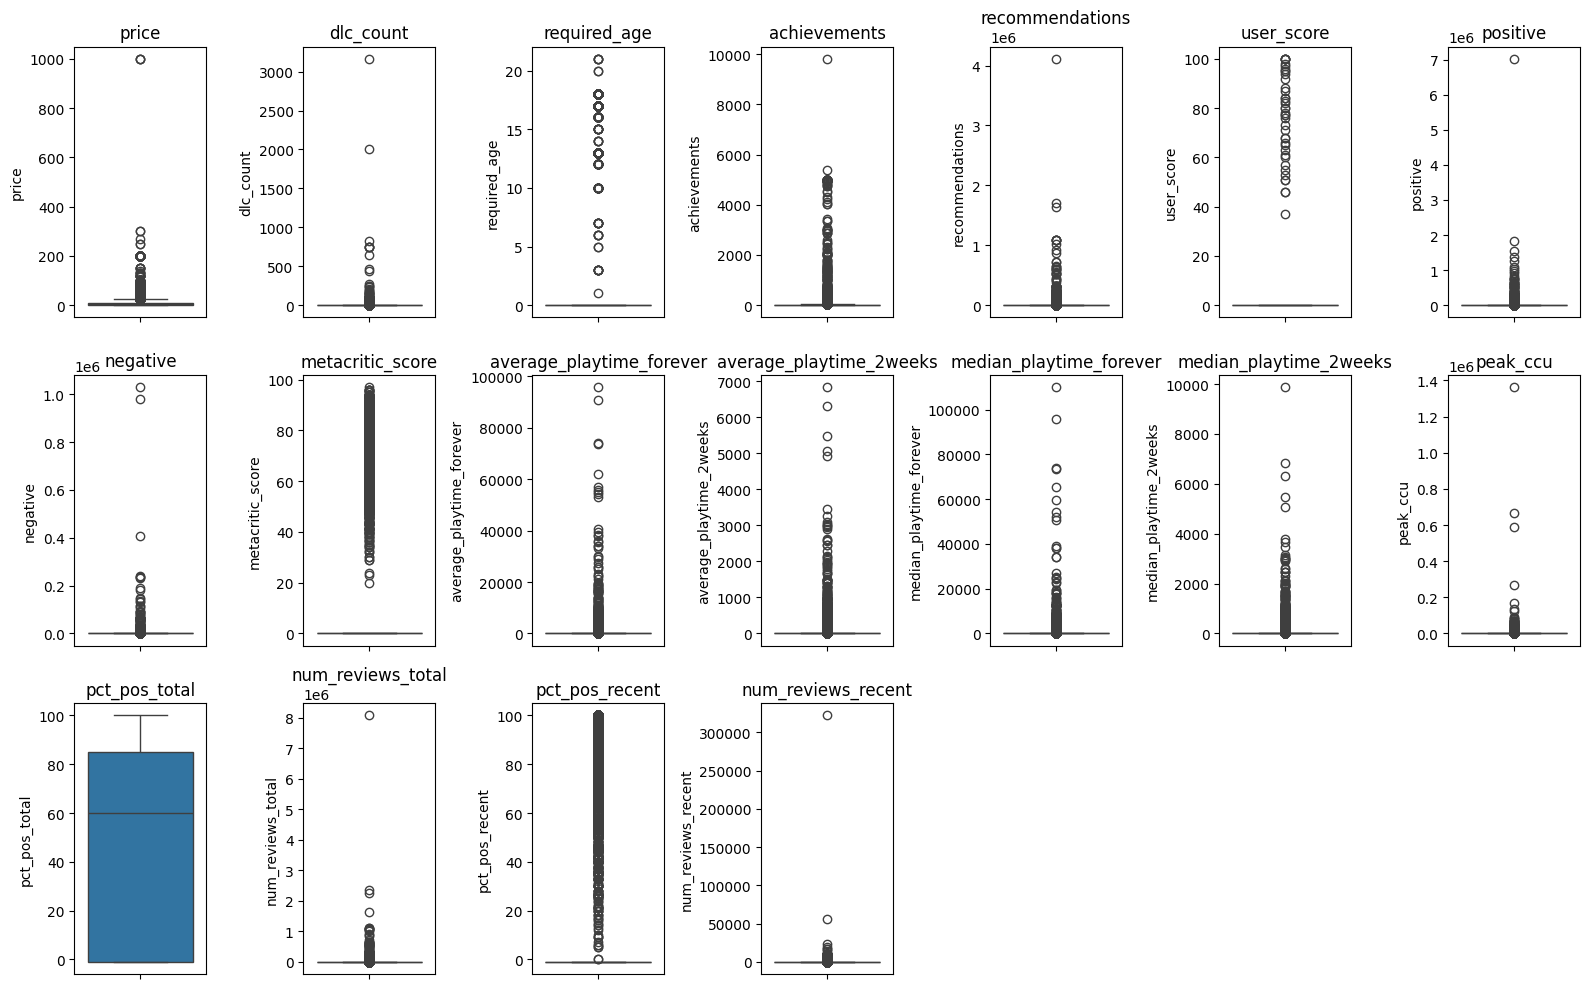

In [ ]:
plt.figure(figsize=(16,10))

for i in range(0,len(numericals)):
  plt.subplot(3, len(numericals)//3 + 1, i+1)
  sns.boxplot(y=df[numericals[i]])
  plt.tight_layout()
  plt.title(numericals[i])

plt.show()

In [ ]:
import pandas as pd

def count_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr

    return df[(df[column] < batas_bawah) | (df[column] > batas_atas)].shape[0]

# Dictionary untuk menyimpan hasil
outliers_count = {}
outliers_count_percentage = {}

# Loop untuk menghitung outliers per kolom
for column in numericals:
      count = count_outliers(df, column)
      percentage = round((count / len(df)) * 100,2)
      outliers_count[column] = count
      outliers_count_percentage[column] = percentage

# Membuat DataFrame dengan hasil
outliers_count_df = pd.DataFrame({
    'Column': outliers_count.keys(),
    'Outliers Count': outliers_count.values(),
    'Outliers Count (%)': outliers_count_percentage.values()
}).sort_values(by='Outliers Count', ascending=False)

outliers_count_df

,Column,Outliers Count,Outliers Count (%)
13,peak_ccu,18701,22.34
4,recommendations,16270,19.43
6,positive,14274,17.05
15,num_reviews_total,13625,16.28
1,dlc_count,13511,16.14
7,negative,13402,16.01
9,average_playtime_forever,9780,11.68
11,median_playtime_forever,9780,11.68
16,pct_pos_recent,6650,7.94
17,num_reviews_recent,6650,7.94


In [ ]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
price,83715.0,7.503889,13.103199,0.0,0.99,4.99,9.99,999.98
dlc_count,83715.0,0.617822,15.078651,0.0,0.00,0.00,0.00,3165.00
required_age,83715.0,0.282781,2.144160,0.0,0.00,0.00,0.00,21.00
achievements,83715.0,20.846718,168.916758,0.0,0.00,4.00,20.00,9821.00
recommendations,83715.0,1081.387649,22436.834742,0.0,0.00,0.00,0.00,4111974.00
user_score,83715.0,0.037437,1.736358,0.0,0.00,0.00,0.00,100.00
positive,83715.0,1300.570388,30648.202319,0.0,2.00,11.00,64.00,7024836.00
negative,83715.0,212.171415,5807.983436,0.0,0.00,3.00,19.00,1029779.00
metacritic_score,83715.0,3.486293,15.765506,0.0,0.00,0.00,0.00,97.00
average_playtime_forever,83715.0,79.674347,1018.118992,0.0,0.00,0.00,0.00,95816.00


In [ ]:
print('Row count of columns with zero value:')
for item in numericals:
  print(f'{item} : {df[df[item] == 0].shape[0]}')

Row count of columns with zero value:
price : 12712
dlc_count : 70204
required_age : 82254
achievements : 39456
recommendations : 67445
user_score : 83674
positive : 16053
negative : 25989
metacritic_score : 79734
average_playtime_forever : 73935
average_playtime_2weeks : 82805
median_playtime_forever : 73935
median_playtime_2weeks : 82805
peak_ccu : 65014
pct_pos_total : 16
num_reviews_total : 0
pct_pos_recent : 2
num_reviews_recent : 0


There are many outliers in the numerical columns. Since not all games have been played by users, it's possible for some games to have a value of 0 in certain fields, such as ratings, positive reviews, negative reviews, etc. That’s why we chose an algorithm that is robust to outliers.

# EDA

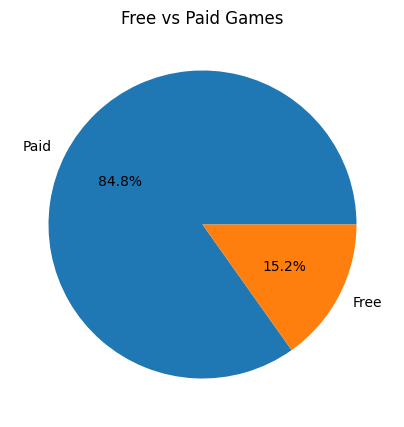

In [ ]:
df['free_or_paid'] = df['price'].apply(lambda x: 'Free' if x==0 else 'Paid')

free_paid_counts_pct = df['free_or_paid'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(free_paid_counts_pct, labels=free_paid_counts_pct.index, autopct='%1.1f%%')
plt.title('Free vs Paid Games')
plt.show()

Most of the games on Steam are paid, with only 15.2% categorized as free games, while the remaining majority are paid. This distribution highlights the dominance of paid games on the platform, which may influence user engagement and purchasing behavior. Free games, while a smaller segment, can still play a significant role in attracting a wider audience, offering opportunities for in-game purchases or upgrades. Understanding this balance between free and paid games is crucial for analyzing market trends and game success on Steam.

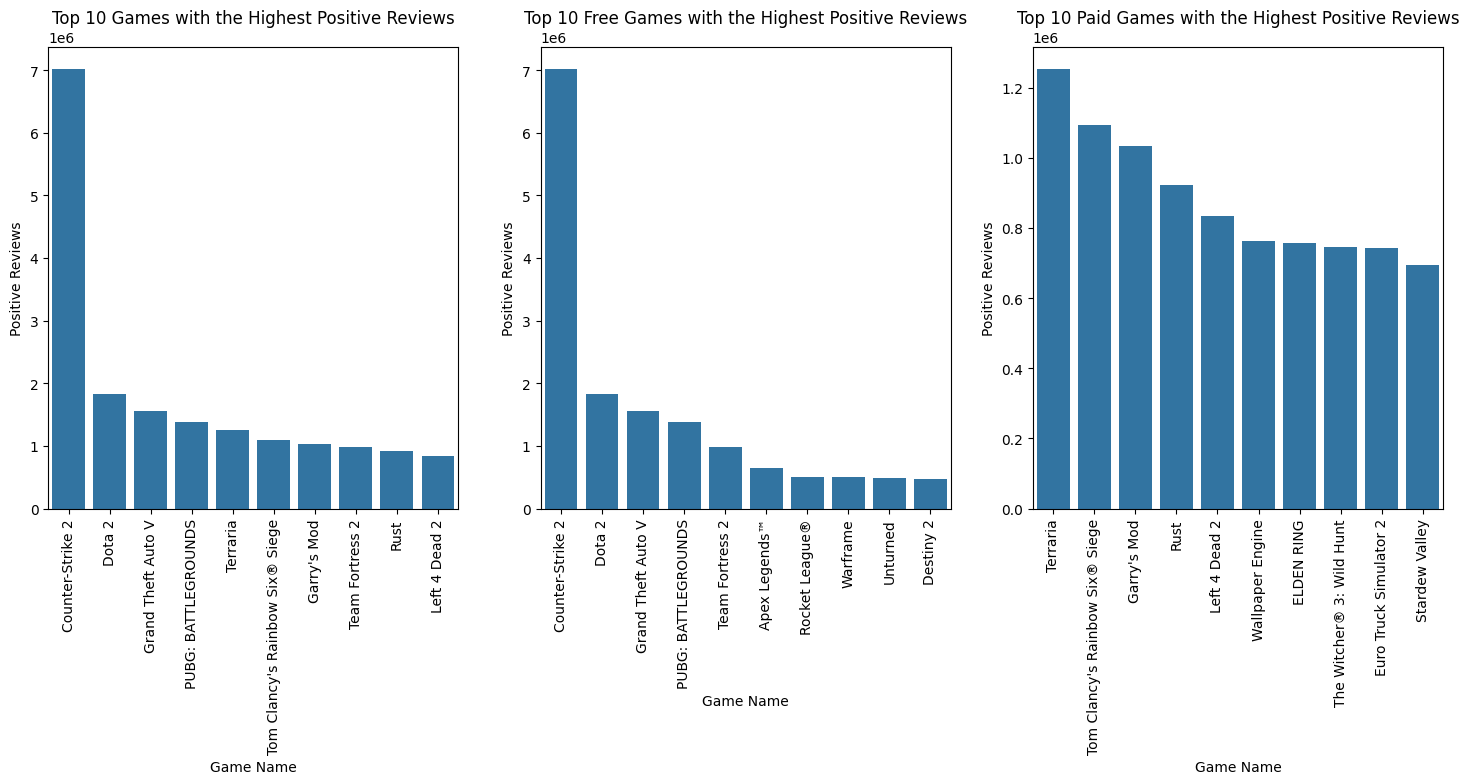

In [ ]:
top_ten_pos = df.sort_values(by='positive', ascending=False).head(10)
top_ten_pos_free = df[df['free_or_paid'] == 'Free'].sort_values(by='positive', ascending=False).head(10)
top_ten_pos_paid = df[df['free_or_paid'] == 'Paid'].sort_values(by='positive', ascending=False).head(10)

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.barplot(data=top_ten_pos, x='name', y='positive')
plt.xlabel('Game Name')
plt.ylabel('Positive Reviews')
plt.xticks(rotation=90)
plt.title('Top 10 Games with the Highest Positive Reviews')

plt.subplot(1,3,2)
sns.barplot(data=top_ten_pos_free, x='name', y='positive')
plt.xlabel('Game Name')
plt.ylabel('Positive Reviews')
plt.xticks(rotation=90)
plt.title('Top 10 Free Games with the Highest Positive Reviews')

plt.subplot(1,3,3)
sns.barplot(data=top_ten_pos_paid, x='name', y='positive')
plt.xlabel('Game Name')
plt.ylabel('Positive Reviews')
plt.xticks(rotation=90)
plt.title('Top 10 Paid Games with the Highest Positive Reviews')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


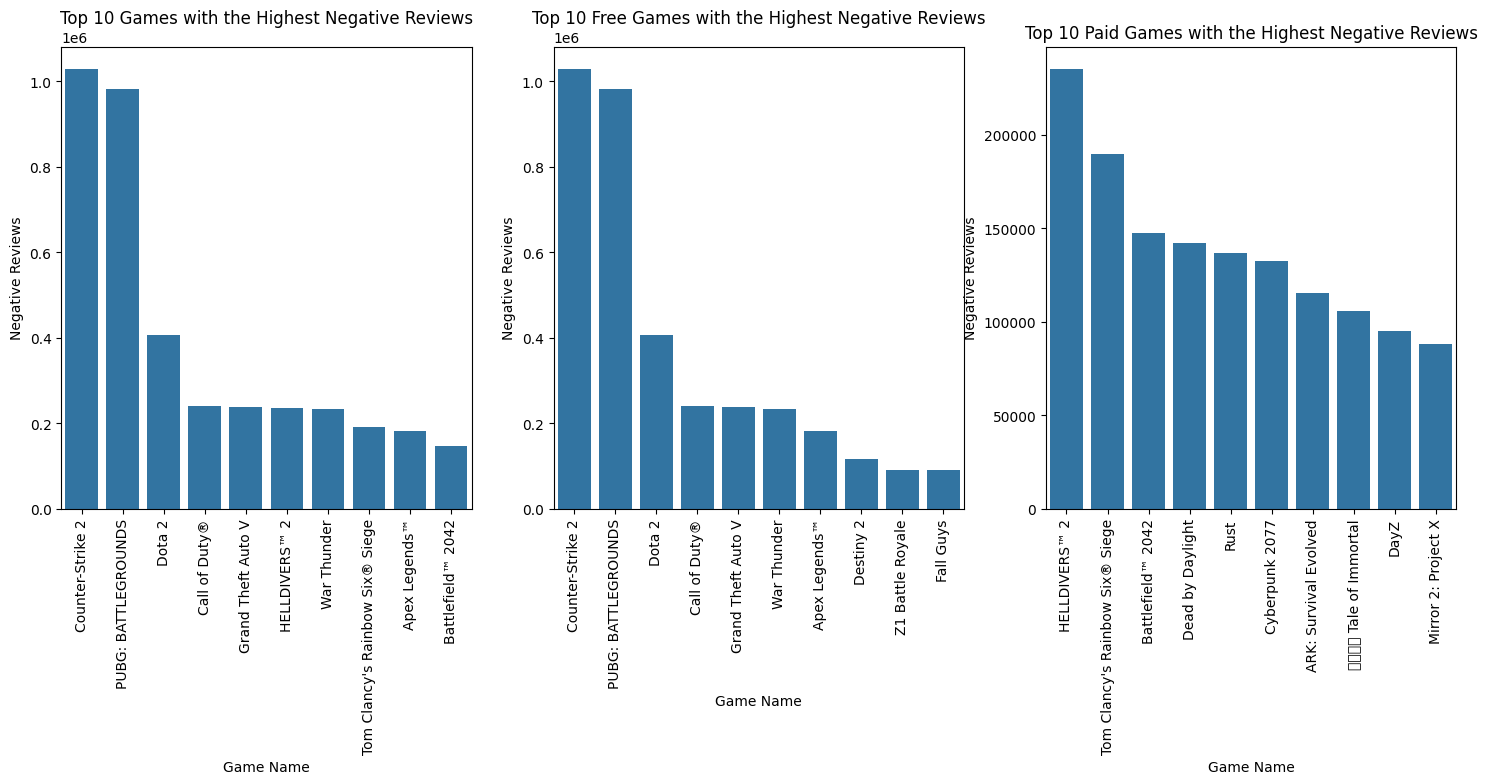

In [ ]:
top_ten_neg = df.sort_values(by='negative', ascending=False).head(10)
top_ten_neg_free = df[df['free_or_paid'] == 'Free'].sort_values(by='negative', ascending=False).head(10)
top_ten_neg_paid = df[df['free_or_paid'] == 'Paid'].sort_values(by='negative', ascending=False).head(10)

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.barplot(data=top_ten_neg, x='name', y='negative')
plt.xlabel('Game Name')
plt.ylabel('Negative Reviews')
plt.xticks(rotation=90)
plt.title('Top 10 Games with the Highest Negative Reviews')

plt.subplot(1,3,2)
sns.barplot(data=top_ten_neg_free, x='name', y='negative')
plt.xlabel('Game Name')
plt.ylabel('Negative Reviews')
plt.xticks(rotation=90)
plt.title('Top 10 Free Games with the Highest Negative Reviews')

plt.subplot(1,3,3)
sns.barplot(data=top_ten_neg_paid, x='name', y='negative')
plt.xlabel('Game Name')
plt.ylabel('Negative Reviews')
plt.xticks(rotation=90)
plt.title('Top 10 Paid Games with the Highest Negative Reviews')

plt.show()

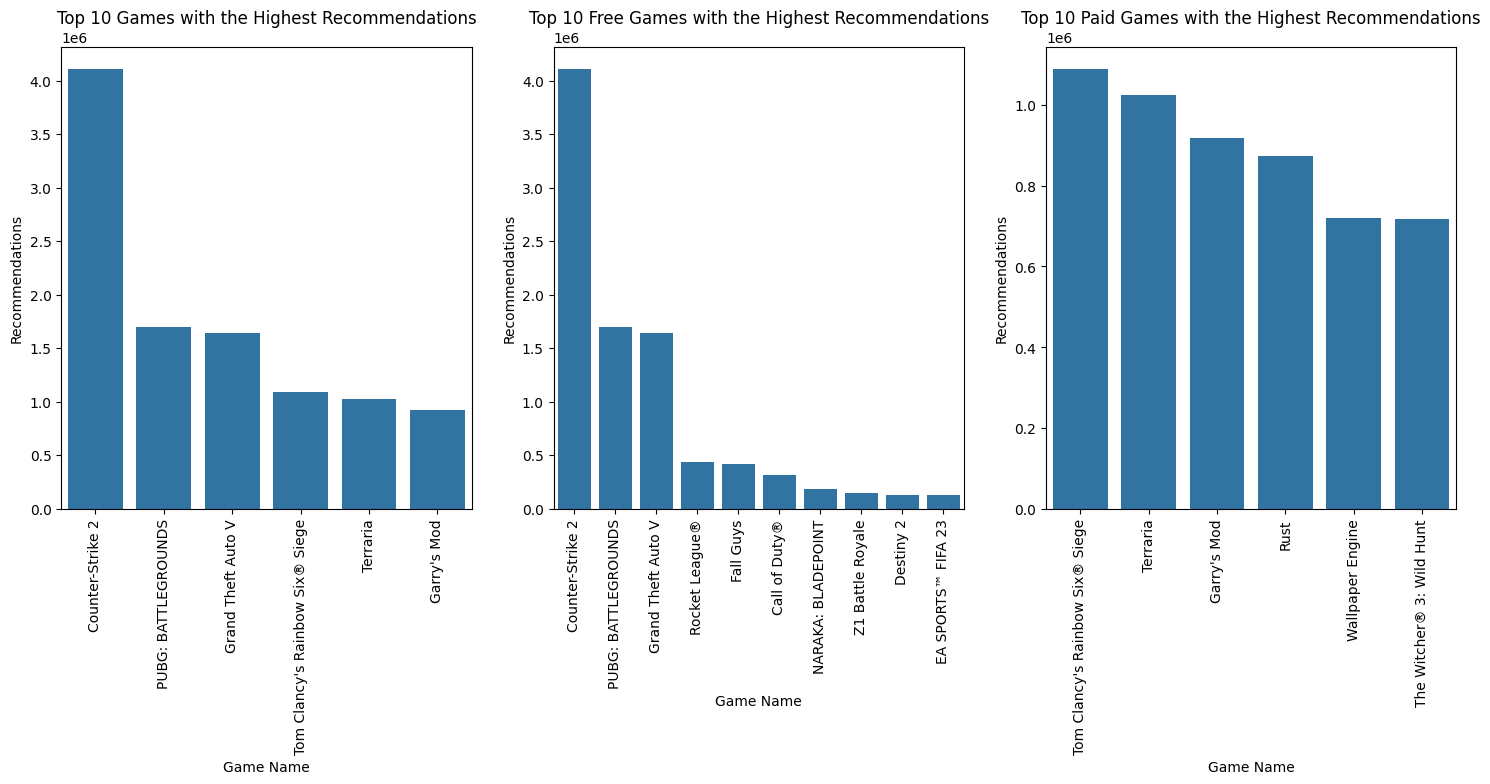

In [ ]:
top_ten_rec = df.sort_values(by='recommendations', ascending=False).head(10)
top_ten_rec_free = df[df['free_or_paid'] == 'Free'].sort_values(by='recommendations', ascending=False).head(10)
top_ten_rec_paid = df[df['free_or_paid'] == 'Paid'].sort_values(by='recommendations', ascending=False).head(10)

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.barplot(data=top_ten_rec, x='name', y='recommendations')
plt.xlabel('Game Name')
plt.ylabel('Recommendations')
plt.xticks(rotation=90)
plt.title('Top 10 Games with the Highest Recommendations')

plt.subplot(1,3,2)
sns.barplot(data=top_ten_rec_free, x='name', y='recommendations')
plt.xlabel('Game Name')
plt.ylabel('Recommendations')
plt.xticks(rotation=90)
plt.title('Top 10 Free Games with the Highest Recommendations')

plt.subplot(1,3,3)
sns.barplot(data=top_ten_rec_paid, x='name', y='recommendations')
plt.xlabel('Game Name')
plt.ylabel('Recommendations')
plt.xticks(rotation=90)
plt.title('Top 10 Paid Games with the Highest Recommendations')

plt.show()

CS 2 ranks as the game, and specifically the free game, with the highest positive reviews. For paid games, Terraria leads with the most positive feedback. Interestingly, CS 2 also holds the top spot for the highest negative reviews among all games and free games, while HELLDIVERS 2 tops the list for paid games with the most negative reviews. Despite its mixed reviews, CS 2 remains one of the most frequently recommended games, including free games, to users. Similarly, Tom Clancy’s Rainbow Six Siege stands out as a frequently recommended paid game.

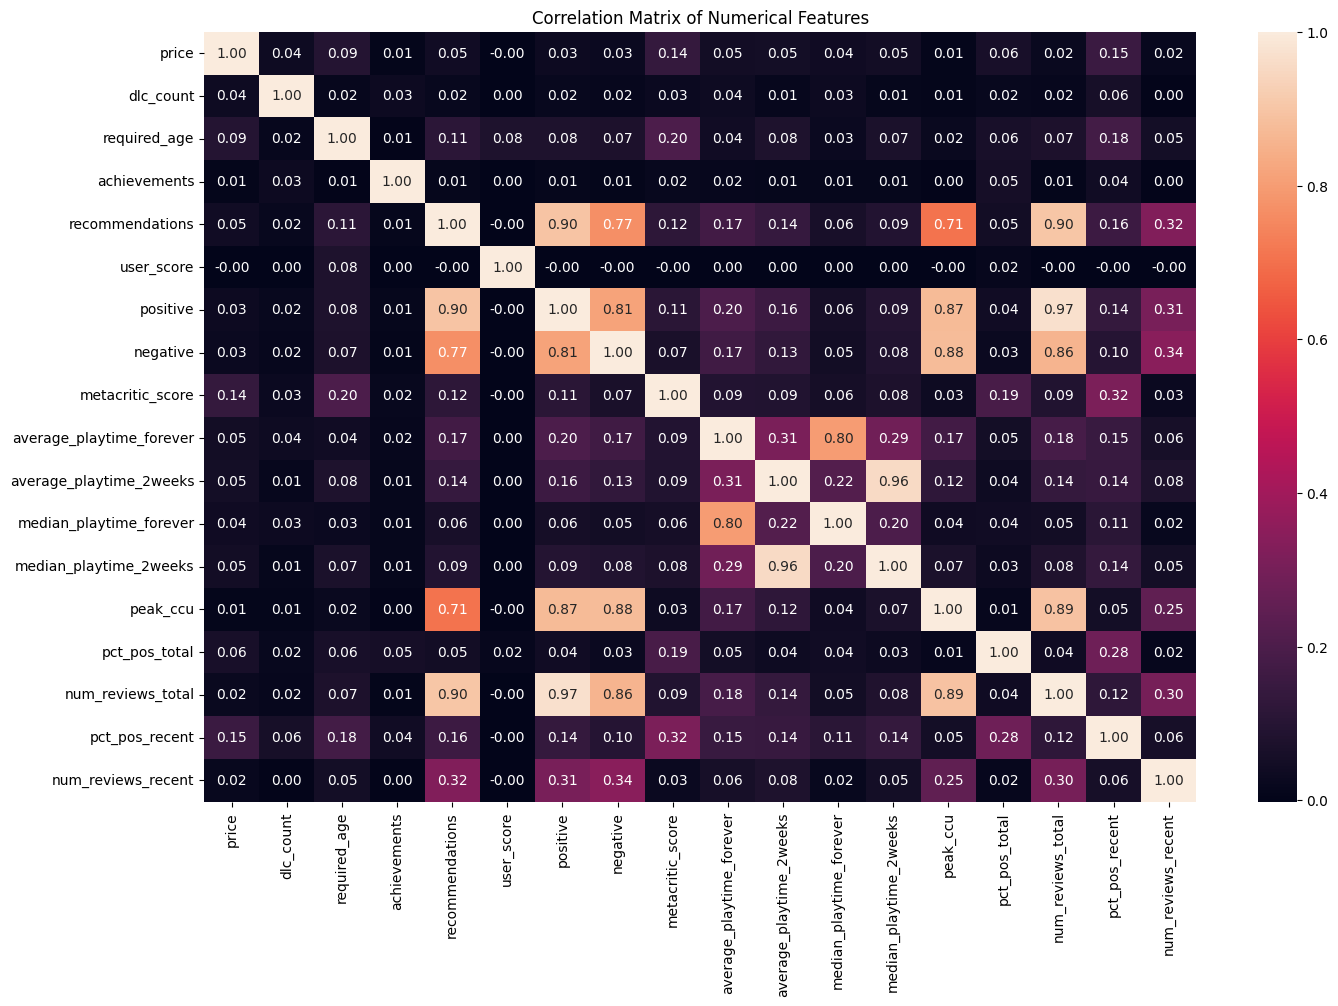

In [ ]:
plt.figure(figsize=(16,10))

numericals_corr = df[numericals].corr()
sns.heatmap(numericals_corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

plt.show()

Recommendations, positive reviews, negative reviews, and peak concurrent users all show strong correlations, indicating that they are interrelated. Similarly, the variables average_playtime_forever, median_playtime_forever, average_playtime_2weeks, and median_playtime_2weeks also exhibit high correlation scores, suggesting that they are closely linked.

Given these correlations, we primarily focus on the recommendation feature when selecting variables for analysis. Since positive reviews, negative reviews, and peak concurrent users are all highly correlated with recommendations, including them separately may not provide additional value and could introduce redundancy. By focusing on recommendation, we capture the essence of user engagement and game popularity efficiently.

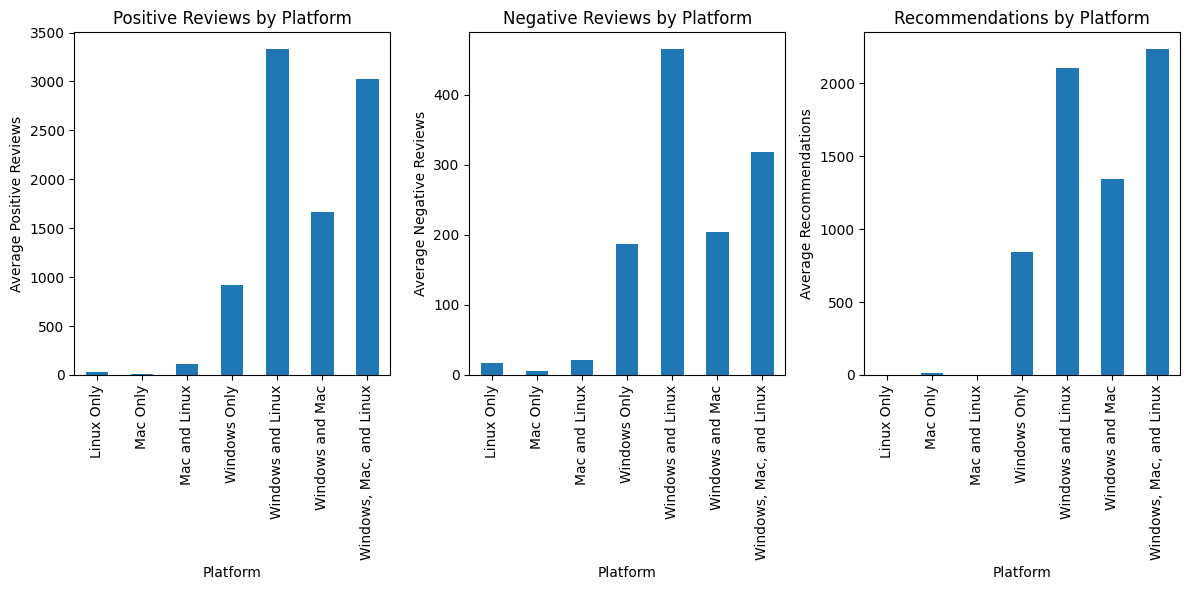

In [ ]:
platform_mapping = {
    (0, 0, 0): 'No Platform',
    (1, 0, 0): 'Windows Only',
    (0, 1, 0): 'Mac Only',
    (0, 0, 1): 'Linux Only',
    (1, 1, 0): 'Windows and Mac',
    (1, 0, 1): 'Windows and Linux',
    (0, 1, 1): 'Mac and Linux',
    (1, 1, 1): 'Windows, Mac, and Linux'
}

df['platform_label'] = df.apply(lambda row: platform_mapping[(row['windows'], row['mac'], row['linux'])], axis=1)


plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
df.groupby('platform_label')['positive'].mean().plot(kind='bar', title="Positive Reviews by Platform")
plt.xlabel('Platform')
plt.ylabel('Average Positive Reviews')

plt.subplot(1,3,2)
df.groupby('platform_label')['negative'].mean().plot(kind='bar', title="Negative Reviews by Platform")
plt.xlabel('Platform')
plt.ylabel('Average Negative Reviews')

plt.subplot(1,3,3)
df.groupby('platform_label')['recommendations'].mean().plot(kind='bar', title="Recommendations by Platform")
plt.xlabel('Platform')
plt.ylabel('Average Recommendations')

plt.tight_layout()
plt.show()

Most games are developed to support both Windows and Linux platforms, with a majority of them predominantly designed for Windows. This highlights the widespread use of Windows as the primary operating system for gaming, while Linux support, though present, remains secondary. The strong focus on Windows is likely due to its large user base and compatibility with popular gaming technologies, making it the dominant platform in the gaming industry.

In [ ]:
number_of_games = df.groupby(df['release_date'].dt.year)['name'].count()
number_of_games.sort_values(ascending=False)

,name
release_date,
2023,14207
2022,11812
2021,10641
2020,8917
2018,7537
2019,7359
2024,6903
2017,6013
2016,4187


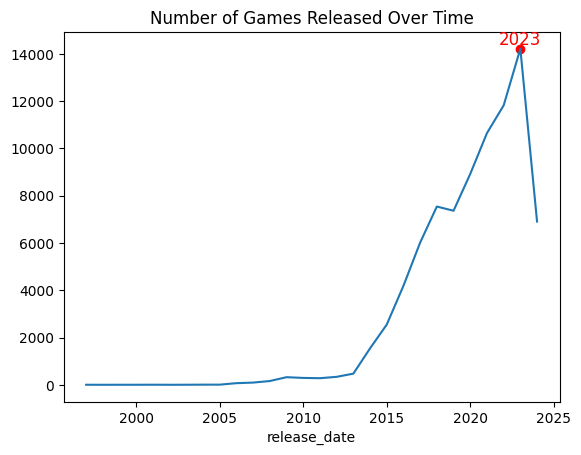

In [ ]:
number_of_games.plot(kind='line', title="Number of Games Released Over Time")

max_year = number_of_games.idxmax()
max_value = number_of_games.max()

plt.scatter(max_year, max_value, color='red')
plt.text(max_year, max_value, f'{max_year}',
         color='red', fontsize=12, ha='center', va='bottom')

plt.show()

The number of games on Steam has been increasing rapidly over the years, reflecting the platform’s growing popularity among developers and players alike. This surge in game releases can be attributed to the rise of indie developers, frequent updates to existing titles, and the ease of digital distribution. As a result, Steam has become one of the largest gaming platforms, offering a diverse range of games that cater to various genres and audiences. This growth presents both opportunities for discovery and challenges in standing out among an increasingly crowded marketplace.

# Recommendation System With Clustering Algorithm

In [ ]:
df_final.head()

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,Episodic,Free to Play,Game Development,Gore,Indie,Massively Multiplayer,Movie,Nudity,Photo Editing,RPG,Racing,Sexual Content,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,No data,No data,1,0,1,0,No data,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",[Valve],[Valve],"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free to Play]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,No data,1,0,0,0,No data,37,1701431,No data,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"[KRAFTON, Inc.]","[KRAFTON, Inc.]","[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,No data,No data,1,1,1,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,No data,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",[Valve],[Valve],"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Action, Strategy, Free to Play]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,No data,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,No data,1

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


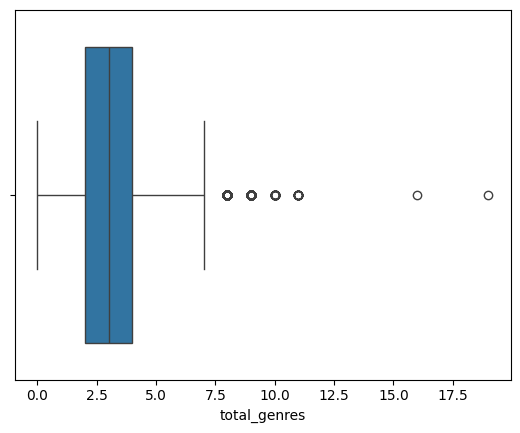

In [ ]:
df_final['total_genres'] = df_final.loc[:, '360 Video':'Web Publishing'].sum(axis=1)

import seaborn as sns
sns.boxplot(x=df_final['total_genres'])

plt.show()

In [ ]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr

    return df[(df[column] < batas_bawah) | (df[column] > batas_atas)]

outliers_df = outliers(df_final, 'total_genres')
outliers_df

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,Episodic,Free to Play,Game Development,Gore,Indie,Massively Multiplayer,Movie,Nudity,Photo Editing,RPG,Racing,Sexual Content,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing,total_genres
1235,991780,Notes of Soul,2019-01-17,0,29.99,0,The gleaning club is an immersive game experie...,The gleaning club is an immersive game experie...,The gleaning club is an immersive game experie...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,No data,https://tieba.baidu.com/f?fr=wwwt&amp;kw=探灵笔记,ainizheshiwodeshi@qq.com,1,0,0,0,No data,0,17636,No data,"['Simplified Chinese', 'Traditional Chinese']","['Simplified Chinese', 'Traditional Chinese']","[{'title': 'Buy Notes of Soul', 'description':...",[（Hong Kong）GKD Game Studio],[（Hong Kong）GKD Game Studio],"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Casual, Indie, Massively M...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,16089,4726,500000 - 1000000,2568,0,1070,0,123,"{'Horror': 111, 'Massively Multiplayer': 103, ...",73,14301,-1,-1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,9
1334,670290,Real Pool 3D - Poolians,2018-01-04,0,0.00,0,Real Pool 3D (Poolians) is one of the best onl...,Real Pool 3D (Poolians) is one of the best onl...,Real Pool 3D (Poolians) is one of the best onl...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.poolians.com,https://www.poolians.com,support@poolians.com,1,0,0,0,No data,0,0,No data,"['English', 'Spanish - Spain', 'Japanese', 'Po...",[],[],[Poolians.com],[ThankGame.com],"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Casual, Free to Play, Indie, Massivel...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,9788,2920,1000000 - 2000000,275,58,74,82,1236,"{'Pool': 178, 'Sports': 162, 'Free to Play': 1...",76,12852,68,347,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,8
1393,311310,Naval Action,2019-06-13,0,0.00,17,"Naval Action is a hardcore, realistic, and bea...","Naval Action is a hardcore, realistic, and bea...","Naval Action is a hardcore, realistic, and bea...",“My Favorite Pain and Suffering Simulator” Gam...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.navalaction.com,https://steamcommunity.com/app/311310/discussi...,No data,1,0,0,0,No data,0,9190,No data,"['English', 'French', 'German', 'Spanish - Spa...",[],[],[Game-Labs],[Game-Labs],"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Indie, Massively Multiplay...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,6985,5220,500000 - 1000000,0,0,0,0,365,"{'Open World': 381, 'Pirates': 375, 'Naval Com...",57,12221,41,63,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,8
1602,215080,WAKFU,2014-09-18,0,0.00,0,STEP INTO A LIMITLESS UNIVERSE Touchdown in th...,STEP INTO A LIMITLESS UNIVERSE Touchdown in th...,STEP INTO A LIMITLESS UNIVERSE Touchdown in th...,“I went into WAKFU with virtually no prior kno...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.wakfu.com,https://support.ankama.com,No data,1,1,1,76,

In [ ]:
df_final.columns

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'positive', 'negative', 'estimated_owners', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'pct_pos_total',
       'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent',
       '360 Video', 'Accounting', 'Action', 'Adventure',
       'Animation & Modeling', 'Audio Production', 'Casual',
       'Design & Illustration', 'Documentary', 'Early Access', 'Education',
       'Episodic

In [ ]:
pca_columns = list(df_final.columns[45:])
# pca_columns.append('recommendations')
pca_columns.remove('total_genres')
pca_columns

['360 Video',
 'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Episodic',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Movie',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Short',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing']

In [ ]:
len(pca_columns)

33

## PCA

Before applying Principal Component Analysis (PCA), it is important to transform the features using StandardScaler to ensure they are on the same scale. This normalization step is crucial, as PCA is sensitive to the relative scaling of the input features. Given that there are 33 genres in the dataset, the high dimensionality can complicate the analysis. To address this, we reduced the number of features using PCA, which helps to simplify the dataset while retaining the most significant variance and patterns in the data. This approach enhances our ability to visualize and interpret the underlying structure of the dataset more effectively.

In [ ]:
X = df_final[pca_columns]
X.head()

,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,Episodic,Free to Play,Game Development,Gore,Indie,Massively Multiplayer,Movie,Nudity,Photo Editing,RPG,Racing,Sexual Content,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

pca_df = pd.DataFrame(data = X_std, columns = pca_columns)
pca_df.head()

,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,Episodic,Free to Play,Game Development,Gore,Indie,Massively Multiplayer,Movie,Nudity,Photo Editing,RPG,Racing,Sexual Content,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,-0.003456,-0.017284,1.184533,-0.808070,-0.068941,-0.04782,-0.860003,-0.076888,-0.003456,-0.340204,-0.068502,-0.003456,3.309707,-0.054288,-0.057514,-1.532558,-0.158398,-0.004888,-0.034755,-0.040339,-0.468906,-0.196656,-0.033706,-0.004888,-0.503656,-0.048691,-0.219858,-0.492335,-0.003456,-0.099948,-0.058857,-0.073186,-0.034583
1,-0.003456,-0.017284,1.184533,1.237517,-0.068941,-0.04782,-0.860003,-0.076888,-0.003456,-0.340204,-0.068502,-0.003456,3.309707,-0.054288,-0.057514,-1.532558,6.313202,-0.004888,-0.034755,-0.040339,-0.468906,-0.196656,-0.033706,-0.004888,-0.503656,-0.048691,-0.219858,-0.492335,-0.003456,-0.099948,-0.058857,-0.073186,-0.034583
2,-0.003456,-0.017284,1.184533,-0.808070,-0.068941,-0.04782,-0.860003,-0.076888,-0.003456,-0.340204,-0.068502,-0.003456,3.309707,-0.054288,-0.057514,-1.532558,-0.158398,-0.004888,-0.034755,-0.040339,-0.468906,-0.196656,-0.033706,-0.004888,-0.503656,-0.048691,-0.219858,2.031136,-0.003456,-0.099948,-0.058857,-0.073186,-0.034583
3,-0.003456,-0.017284,1.184533,1.237517,-0.068941,-0.04782,-0.860003,-0.076888,-0.003456,-0.340204,-0.068502,-0.003456,-0.302142,-0.054288,-0.057514,-1.532558,-0.158398,-0.004888,-0.034755,-0.040339,-0.468906,-0.196656,-0.033706,-0.004888,-0.503656,-0.048691,-0.219858,-0.492335,-0.003456,-0.099948,-0.058857,-0.073186,-0.034583
4,-0.003456,-0.017284,1.184533,-0.808070,-0.068941,-0.04782,-0.860003,-0.076888,-0.003456,-0.340204,-0.068502,-0.003456,-0.302142,-0.054288,-0.057514,-1.532558,-0.158398,-0.004888,-0.034755,-0.040339,-0.468906,-0.196656,-0.033706,-0.004888,-0.503656,-0.048691,-0.219858,-0.492335,-0.003456,-0.099948,-0.058857,-0.073186,-0.034583


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=33)
pca.fit(X_std)
pcs = pca.transform(X_std)

In [ ]:
pdf = pd.DataFrame(data = pcs, columns = [f'pc{iter}' for iter in range(1,34)])
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33
0,-0.028938,0.041835,-0.050024,-0.557622,1.104504,-0.214051,0.730859,0.601852,-2.784114,1.083188,-0.248078,0.306439,0.362572,-0.172992,0.802652,0.433810,1.073796,-1.456149,-0.020360,0.501273,0.597882,0.806341,0.046068,-0.065143,0.028493,0.026020,0.009515,-0.005356,0.002664,-0.016212,-2.411206e-16,-3.729681e-16,-8.243217e-17
1,-0.056286,-0.188258,0.081306,-1.021789,4.834744,0.917890,1.620401,0.896763,-3.498795,2.259476,1.008683,-1.053096,-0.149140,0.110882,1.231858,-0.147886,-1.460107,2.002002,1.009275,-0.212347,-0.562676,-0.650225,-0.159922,0.080174,0.046862,0.014765,0.167060,-0.113472,0.011916,-0.031041,-4.303139e-16,-6.678711e-16,3.650181e-16
2,-0.041755,-0.047786,-0.162574,0.066849,1.369088,0.972761,0.193895,0.516380,-2.480188,0.796524,-0.481436,0.787330,0.841082,-1.451675,0.508294,0.311601,1.227570,-1.201880,1.014204,1.216111,0.634111,1.044453,0.170498,-0.153387,-0.041918,0.011390,0.016472,-0.034702,0.005457,-0.025717,-2.652983e-16,-4.852915e-16,-3.565185e-16
3,-0.045231,-0.053480,0.099571,-1.363546,0.117813,-0.892944,0.412690,0.163762,-0.631568,-0.441963,-1.035183,-0.475859,0.162835,0.251924,0.749691,0.114471,-0.495964,0.243555,0.791533,0.686829,0.256129,0.444085,0.019337,0.018082,0.021393,-0.019556,0.014894,-0.001992,-0.005689,-0.025078,-1.438677e-16,-1.960263e-16,4.084162e-17
4,-0.024085,0.082650,-0.016328,-0.612909,-0.090104,-0.915317,0.262091,0.270567,-1.359507,-0.348334,-1.259156,0.523352,0.429042,-0.133922,0.268264,0.067942,-0.479466,0.109668,-0.295270,0.196198,0.402076,0.459592,-0.040107,0.060407,0.064861,-0.000342,-0.006051,0.005155,-0.010226,-0.036120,-1.408319e-16,-4.549338e-16,1.969667e-16


In [ ]:
print('Explained variance:', pca.explained_variance_*100)

Explained variance: [5.27829080e+02 3.35129155e+02 1.96549993e+02 1.51070280e+02
 1.35245486e+02 1.28860344e+02 1.19054366e+02 1.16656650e+02
 1.14421025e+02 1.09763409e+02 1.05851730e+02 1.02526074e+02
 9.18832405e+01 8.62918974e+01 8.11766732e+01 7.97433056e+01
 7.84080489e+01 7.74612021e+01 7.29192268e+01 7.15100607e+01
 6.77103757e+01 6.66081476e+01 6.19694076e+01 5.85198255e+01
 5.45972063e+01 5.19775364e+01 4.99640478e+01 3.90519996e+01
 3.45992577e+01 3.26903682e+01 3.46519753e-14 3.43827997e-14
 0.00000000e+00]


In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_*100)
cumsum

array([ 15.99462955,  26.14993718,  32.10592642,  36.68375901,
        40.78205813,  44.68687039,  48.29453537,  51.82954314,
        55.2968055 ,  58.62292967,  61.83051952,  64.93733315,
        67.72164051,  70.33651526,  72.79638506,  75.21282   ,
        77.5887931 ,  79.93607422,  82.14572136,  84.31266701,
        86.36447207,  88.38287667,  90.26071508,  92.03402194,
        93.68846298,  95.26352102,  96.77756499,  97.96094478,
        99.00939462, 100.        , 100.        , 100.        ,
       100.        ])

The PCA retains at least 80% of the original information from the dataset, resulting in 19 features after the dimensionality reduction process. This significant reduction in the number of features allows for a more manageable analysis while preserving the essential variance and patterns within the data. By focusing on these 19 features, we can streamline further analyses, improve computational efficiency, and reduce the risk of overfitting, all while maintaining a robust representation of the dataset's underlying structure.

In [ ]:
pca = PCA(n_components=19)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = [f'pc{iter}' for iter in range(1,20)])
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
0,-0.028938,0.041835,-0.050024,-0.557622,1.104504,-0.214051,0.730859,0.601852,-2.784114,1.083188,-0.248078,0.306439,0.362572,-0.172992,0.802652,0.433810,1.073796,-1.456149,-0.020360
1,-0.056286,-0.188258,0.081306,-1.021789,4.834744,0.917890,1.620401,0.896763,-3.498795,2.259476,1.008683,-1.053096,-0.149140,0.110882,1.231858,-0.147886,-1.460107,2.002002,1.009275
2,-0.041755,-0.047786,-0.162574,0.066849,1.369088,0.972761,0.193895,0.516380,-2.480188,0.796524,-0.481436,0.787330,0.841082,-1.451675,0.508294,0.311601,1.227570,-1.201880,1.014204
3,-0.045231,-0.053480,0.099571,-1.363546,0.117813,-0.892944,0.412690,0.163762,-0.631568,-0.441963,-1.035183,-0.475859,0.162835,0.251924,0.749691,0.114471,-0.495964,0.243555,0.791533
4,-0.024085,0.082650,-0.016328,-0.612909,-0.090104,-0.915317,0.262091,0.270567,-1.359507,-0.348334,-1.259156,0.523352,0.429042,-0.133922,0.268264,0.067942,-0.479466,0.109668,-0.295270


## K Medoids

### With PCA

## DBSCAN

I chose to use DBSCAN for clustering because it is particularly effective in handling datasets with many outliers. Unlike traditional clustering algorithms that may be influenced by outliers, DBSCAN can identify clusters of varying shapes and sizes while treating noise points as outliers. This characteristic makes it well-suited for datasets where the presence of outliers is significant, allowing for a more accurate representation of the underlying structure in the data.

In [ ]:
# X = df_final.loc[:, '360 Video':'Web Publishing']
# X = pd.concat([X, df_final[['recommendations','average_playtime_forever','average_playtime_2weeks']]], axis=1)
# X = pd.concat([X_std_pca, df_final['recommendations']], axis=1)
X = X_std_pca
X.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
0,-0.028938,0.041835,-0.050024,-0.557622,1.104504,-0.214051,0.730859,0.601852,-2.784114,1.083188,-0.248078,0.306439,0.362572,-0.172992,0.802652,0.433810,1.073796,-1.456149,-0.020360
1,-0.056286,-0.188258,0.081306,-1.021789,4.834744,0.917890,1.620401,0.896763,-3.498795,2.259476,1.008683,-1.053096,-0.149140,0.110882,1.231858,-0.147886,-1.460107,2.002002,1.009275
2,-0.041755,-0.047786,-0.162574,0.066849,1.369088,0.972761,0.193895,0.516380,-2.480188,0.796524,-0.481436,0.787330,0.841082,-1.451675,0.508294,0.311601,1.227570,-1.201880,1.014204
3,-0.045231,-0.053480,0.099571,-1.363546,0.117813,-0.892944,0.412690,0.163762,-0.631568,-0.441963,-1.035183,-0.475859,0.162835,0.251924,0.749691,0.114471,-0.495964,0.243555,0.791533
4,-0.024085,0.082650,-0.016328,-0.612909,-0.090104,-0.915317,0.262091,0.270567,-1.359507,-0.348334,-1.259156,0.523352,0.429042,-0.133922,0.268264,0.067942,-0.479466,0.109668,-0.295270


In [ ]:
len(X.columns)

19

In [ ]:
X.isna().sum()

,0
pc1,0
pc2,0
pc3,0
pc4,0
pc5,0
pc6,0
pc7,0
pc8,0
pc9,0
pc10,0


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.0125958 ,  0.02285284, -0.03568131, ...,  1.21267438,
        -1.6544982 , -0.02384304],
       [-0.02449959, -0.10283722,  0.05799467, ..., -1.64894786,
         2.27470431,  1.18192761],
       [-0.01817451, -0.02610326, -0.11596259, ...,  1.38633606,
        -1.3655944 ,  1.18769993],
       ...,
       [-0.01462315, -0.02142942, -0.07575315, ...,  0.32775471,
        -0.22333478, -0.36776033],
       [-0.03286108, -0.16549442,  0.10532329, ...,  0.16461592,
         0.3811735 ,  0.6182274 ],
       [-0.04533816, -0.28087738,  5.63413296, ...,  0.32504537,
         0.62971733,  1.70216409]])

In [ ]:
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# X_sample = X_scaled_df.sample(frac=1, random_state=42)

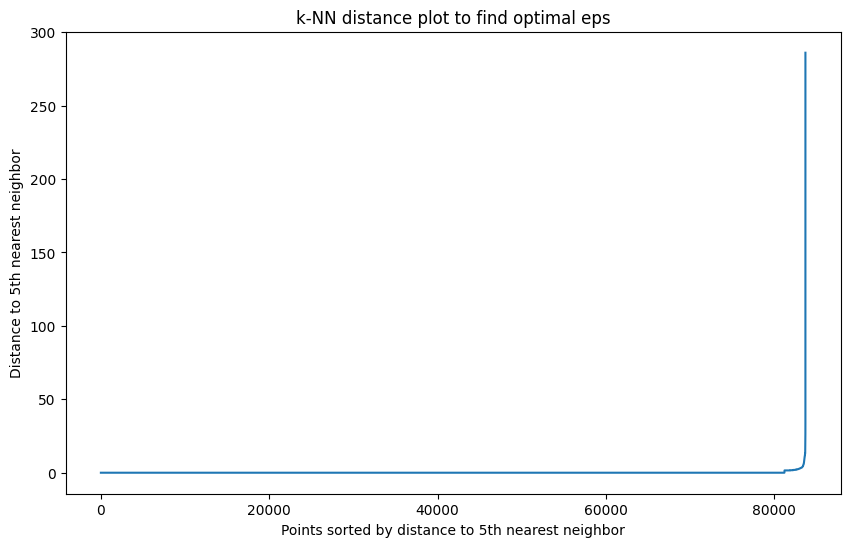

In [ ]:
# Find optimal eps for DBSCAN

from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-NN distance plot to find optimal eps')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()

In [ ]:
pip install kneed

In [ ]:
# Find exact optimal eps for DBSCAN

from kneed import KneeLocator

kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
optimal_eps = distances[kneedle.knee]
print(f"Optimal eps found: {optimal_eps}")

Optimal eps found: 14.882583608925852


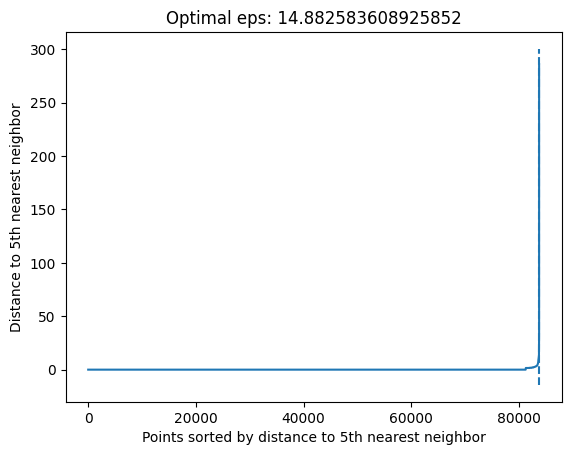

In [ ]:
plt.plot(distances)
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title(f"Optimal eps: {optimal_eps}")
plt.xlabel("Points sorted by distance to 5th nearest neighbor")
plt.ylabel("Distance to 5th nearest neighbor")
plt.show()

To determine the optimal epsilon for DBSCAN, we found that the optimal epsilon is approximately 14.88. This value will enhance the clustering process by allowing DBSCAN to form well-defined clusters while effectively managing noise and outliers.

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd

# eps_range = np.arange(0.5, 1.0, 0.05)
# eps_range = np.arange(14, 15, 0.2)
eps_range = np.arange(1, 2, 0.5)
min_samples_range = range(19, 38)

results = []

for eps in eps_range:
    for min_samples in min_samples_range:
        # Fit DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_

        # Calculate number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        results.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'n_noise': n_noise})


results_df = pd.DataFrame(results)
print(results_df)


    eps  min_samples  n_clusters  n_noise
0   1.0           19         343     5963
1   1.0           20         332     6172
2   1.0           21         324     6332
3   1.0           22         318     6458
4   1.0           23         307     6700
5   1.0           24         300     6861
6   1.0           25         291     7077
7   1.0           26         283     7277
8   1.0           27         277     7433
9   1.0           28         269     7649
10  1.0           29         265     7761
11  1.0           30         259     7935
12  1.0           31         255     8055
13  1.0           32         250     8210
14  1.0           33         245     8370
15  1.0           34         244     8403
16  1.0           35         243     8437
17  1.0           36         238     8612
18  1.0           37         228     8972
19  1.5           19         343     5963
20  1.5           20         332     6172
21  1.5           21         324     6332
22  1.5           22         318  

Due to hardware limitations, I searched for epsilon in the range of 1 to 2, with the minimum sample range between 19 and 38. I found the best epsilon to be 1.5 with a minimum sample size of 22. This resulted in 318 clusters and 6458 noise points, which is quite high.

In [ ]:
best_eps = 1.5
best_min_samples = 22

db_optimal = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_scaled)
optimal_labels = db_optimal.labels_

n_clusters_optimal = len(set(optimal_labels)) - (1 if -1 in optimal_labels else 0)
n_noise_optimal = list(optimal_labels).count(-1)

print(f'Optimal eps: {best_eps}, Optimal min_samples: {best_min_samples}')
print(f'Number of clusters: {n_clusters_optimal}')
print(f'Number of noise points: {n_noise_optimal}')


Optimal eps: 1.5, Optimal min_samples: 22
Number of clusters: 318
Number of noise points: 6458


In [ ]:
df_final['cluster_label'] = optimal_labels

df_final.head()

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,Education,Episodic,Free to Play,Game Development,Gore,Indie,Massively Multiplayer,Movie,Nudity,Photo Editing,RPG,Racing,Sexual Content,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing,total_genres,cluster_label
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",No data,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,No data,No data,1,0,1,0,No data,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",[Valve],[Valve],"[Multi-player, Cross-Platform Multiplayer, Ste...","[Action, Free to Play]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,No data,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,No data,1,0,0,0,No data,37,1701431,No data,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"[KRAFTON, Inc.]","[KRAFTON, Inc.]","[Multi-player, PvP, Online PvP, Stats, Remote ...","[Action, Adventure, Massively Multiplayer, Fre...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-1
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,No data,No data,1,1,1,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,No data,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",[Valve],[Valve],"[Multi-player, Co-op, Steam Trading Cards, Ste...","[Action, Strategy, Free to Play]",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,1
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,No data,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,htt

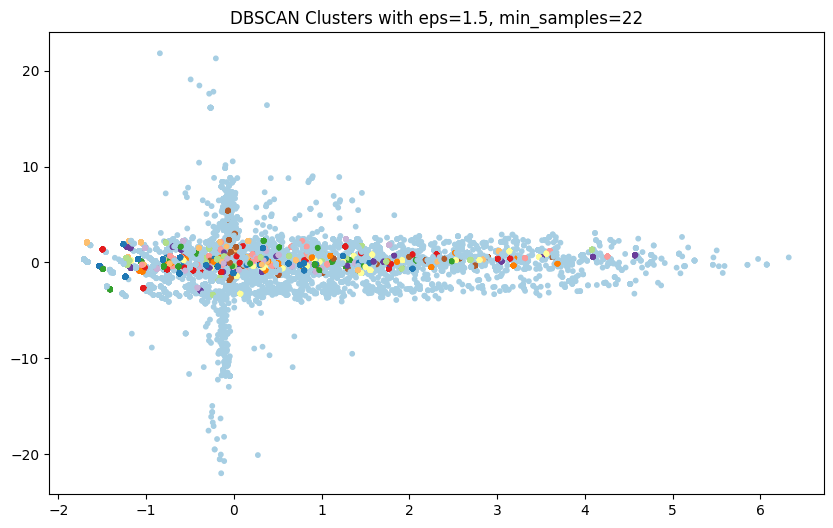

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=optimal_labels, cmap='Paired', s=10)
plt.title(f'DBSCAN Clusters with eps={best_eps}, min_samples={best_min_samples}')
plt.show()

The clustering plot reveals that while the clusters are somewhat distinct, some overlap is still present, which is common in high-dimensional data. Additionally, light blue points represent noise, labeled as -1 by DBSCAN, which identifies these as outliers or noise points within the dataset. This capability to distinguish between clusters and noise underscores the effectiveness of DBSCAN in handling complex data structures.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, optimal_labels)
print(f'Silhouette Score for optimal DBSCAN: {silhouette_avg:.3f}')

Silhouette Score for optimal DBSCAN: 0.871


The Silhouette Score for the optimal DBSCAN configuration is 0.871, indicating a strong clustering performance. This high score suggests that most data points are well-assigned to their respective clusters and are adequately separated from other clusters.

## Recommendation System

In [ ]:
def recommend_items_refined(target_item_id, item_features, num_recommendations=10, sort_by='recommendations'):

    target_cluster = item_features.loc[target_item_id, 'cluster_label']

    if target_cluster == -1:
        print("This item is considered noise and has no cluster.")
        return pd.DataFrame()

    cluster_items = item_features[item_features['cluster_label'] == target_cluster]
    recommendations = cluster_items[cluster_items.index != target_item_id]

    recommended_items = recommendations.sort_values(by=sort_by, ascending=False).head(num_recommendations)
    return recommended_items


The game recommendations are based on the AppID, leading to the identification of the top 10 game recommendations sorted by the 'recommendations' column. This sorting allows for a clear view of the most recommended games, highlighting those that have received significant positive feedback from users. By analyzing these top recommendations, insights can be gained into user preferences and trends within the gaming community.

In [ ]:
target_item_id = 730

refined_recommendations = recommend_items_refined(target_item_id, df_final, num_recommendations=30, sort_by='recommendations')

print(f"Refined recommended items for item {target_item_id}:")
refined_recommendations[['name', 'genres', 'categories', 'recommendations']]


Refined recommended items for item 730:


,name,genres,categories,recommendations
945,Buckshot Roulette,"[Action, Indie, Simulation]","[Single-player, Steam Achievements, Steam Trad...",19365
1132,Cruelty Squad,"[Action, Indie, Simulation]","[Single-player, Steam Achievements, Family Sha...",15868
1218,VTOL VR,"[Action, Indie, Simulation]","[Single-player, Multi-player, PvP, Online PvP,...",14505
1285,Project Wingman,"[Action, Indie, Simulation]","[Single-player, Steam Achievements, Full contr...",13380
1300,Surgeon Simulator,"[Action, Indie, Simulation]","[Single-player, Steam Achievements, Steam Trad...",13198
1457,Avorion,"[Action, Indie, Simulation]","[Single-player, Multi-player, PvP, Online PvP,...",11334
1575,Five Nights at Freddy's: Sister Location,"[Action, Indie, Simulation]","[Single-player, Family Sharing]",10076
1744,Bad North: Jotunn Edition,"[Action, Indie, Simulation]","[Single-player, Steam Achievements, Full contr...",8676
1777,Five Nights at Freddy's 3,"[Action, Indie, Simulation]","[Single-player, Family Sharing]",8486
2000,Shower With Your Dad Simulator 2015: Do You St...,"[Action, Indie, Simulation]","[Single-player, Multi-player, PvP, Shared/Spli...",7121


# Impact for User

* Saves Time and Effort

    Users can rely on the recommendation system to highlight titles that align with their favorite genres

* Opportunities to Explore New Genres

    Users can rely on the recommendation system to highlight titles that align with their favorite genres

* Enhanced Gaming Experience:

    Users will benefit from a more curated gaming experience, with recommendations that reflect their interests and preferences

# Impact for Business

* Targeted Marketing Campaigns

    Utilize genre-based recommendations to create targeted marketing campaigns that promote specific genres or newly released games within those genres.

* Enhancing User Retention

    By consistently providing personalized game recommendations that resonate with user preferences, the platform can enhance user retention rates.

* Data-Driven Product Development

    Analyze user interactions with recommended games to identify trends in gaming preferences.